# Generate data

In [1]:
import time
from itertools import permutations

import jsonlines
import numpy as np
import pandas as pd

In [89]:
df = pd.read_html("https://www.xe.com/symbols.php")

In [90]:
df = df[0]
df.columns = df.iloc[0,:]
df = df.iloc[1:]

In [91]:
df.head()

,Country and Currency,Currency Code,Graphic Image,Font: Code2000,Font: Arial Unicode MS,Unicode: Decimal,Unicode: Hex,NaN
1,Albania Lek,ALL,NaN,Lek,Lek,"76, 101, 107","4c, 65, 6b",NaN
2,Afghanistan Afghani,AFN,NaN,؋,؋,1547,60b,NaN
3,Argentina Peso,ARS,NaN,$,$,36,24,info
4,Aruba Guilder,AWG,NaN,ƒ,ƒ,402,192,NaN
5,Australia Dollar,AUD,NaN,$,$,36,24,NaN


In [92]:
currencies = set(df['Currency Code'].unique())

In [93]:
print("Number of unique currencies", len(currencies))

Number of unique currencies 109


In [94]:
currency_pairs = list(permutations(currencies, 2))

In [95]:
currency_pairs = set([src + dest for src, dest in currency_pairs])

In [96]:
currency_pairs = list(currency_pairs)

In [97]:
curr_pair = currency_pairs[0]

In [98]:
print("Number of currency pairs:", len(currency_pairs))

Number of currency pairs: 11772


## 1 second data for all currency pairs

In [138]:
df = pd.DataFrame(currency_pairs, columns=['currencyPair'])

In [139]:
df

,currencyPair
0,JMDFJD
1,PYGCOP
2,NPRAFN
3,NPRYER
4,VNDGGP
...,...
11767,PABPKR
11768,ILSGGP
11769,RSDKPW
11770,SARBYN


In [140]:
df['rate'] = np.random.normal(1, 0.2, size=len(currency_pairs))

In [141]:
df['timestamp'] = time.time()

In [142]:
writer = jsonlines.open('../input/1second_all.jsonl', mode='a')

for idx, row in df.iterrows():
    writer.write(
        {
            "timestamp": row["timestamp"],
            "currencyPair": row["currencyPair"],
            "rate": row["rate"]
        }
    )
    
writer.close()

In [143]:
df.count()

currencyPair    11772
rate            11772
timestamp       11772
dtype: int64

## 10 minute data for AUDUSD

In [144]:
n = 60 * 10
data = np.random.normal(1, 0.2, size=n)

In [145]:
df = pd.DataFrame(data, columns=['rate'])

In [146]:
df['currencyPair'] = "AUDUSD"

In [147]:
ts = int(time.time())
df['timestamp'] = np.arange(ts, ts+n)

In [148]:
writer = jsonlines.open('../input/10min_single_curr.jsonl', mode='a')

for idx, row in df.iterrows():
    writer.write(
        {
            "timestamp": row["timestamp"],
            "currencyPair": row["currencyPair"],
            "rate": row["rate"]
        }
    )
    
writer.close()

In [149]:
df.count()

rate            600
currencyPair    600
timestamp       600
dtype: int64

In [150]:
# last 5 minute moving average
df.iloc[-300:]['rate'].mean()

0.9934236150574627

## 1 min x all currency pairs

In [151]:
from typing import List

def generate_data(currency_pairs: List[str], ts) -> pd.DataFrame:
    data = np.random.normal(1, 0.2, size=len(currency_pairs))
    df = pd.DataFrame(data, columns=['rate'])
    df['currencyPair'] = currency_pairs
    df['timestamp'] = ts
    df['timestamp'] += np.random.normal(0.001, 0.0001, size=len(currency_pairs))
    return df

In [152]:
n = 60
start_time = ts = time.time()

data = []
for i in range(n):
    data += generate_data(currency_pairs, ts),
    ts += 1
    
df = pd.concat(data)

In [153]:
df['currencyPair'].value_counts()

MYRKZT    60
BYNHKD    60
YERPAB    60
ALLUAH    60
RUBCZK    60
          ..
KZTPKR    60
QARARS    60
BGNJMD    60
FKPBWP    60
ILSGGP    60
Name: currencyPair, Length: 11772, dtype: int64

In [154]:
df.sort_values(['timestamp', 'currencyPair'], inplace=True)

In [155]:
df.reset_index(drop=True, inplace=True)

In [156]:
diff = df.loc[df['currencyPair'] == 'AUDUSD', ['timestamp']] - df.loc[df['currencyPair'] == 'AUDUSD', ['timestamp']].shift(1)
diff.describe()

,timestamp
count,59.000000
mean,1.000004
std,0.000164
min,0.999619
25%,0.999897
50%,0.999971
75%,1.000128
max,1.000334


In [157]:
df.count()

rate            706320
currencyPair    706320
timestamp       706320
dtype: int64

In [158]:
writer = jsonlines.open('../input/1min_all.jsonl', mode='a')

for idx, row in df.iterrows():
    writer.write(
        {
            "timestamp": row["timestamp"],
            "currencyPair": row["currencyPair"],
            "rate": row["rate"]
        }
    )
    
writer.close()

## 5 min x all currency pairs

In [159]:
n = 300
start_time = ts = time.time()

data = []
for i in range(n):
    data += generate_data(currency_pairs, ts),
    ts += 1
    
df = pd.concat(data)

In [160]:
df['currencyPair'].value_counts()

ILSPYG    300
RONMNT    300
CRCKZT    300
KGSKHR    300
PHPINR    300
         ... 
RSDALL    300
ANGGIP    300
TTDNAD    300
SYPUZS    300
NADRON    300
Name: currencyPair, Length: 11772, dtype: int64

In [161]:
df.sort_values(['timestamp', 'currencyPair'], inplace=True)

In [162]:
df.reset_index(drop=True, inplace=True)

In [163]:
diff = df.loc[df['currencyPair'] == 'AUDUSD', ['timestamp']] - df.loc[df['currencyPair'] == 'AUDUSD', ['timestamp']].shift(1)
diff.describe()

,timestamp
count,299.000000
mean,1.000000
std,0.000136
min,0.999671
25%,0.999907
50%,1.000004
75%,1.000091
max,1.000376


In [164]:
df.count()

rate            3531600
currencyPair    3531600
timestamp       3531600
dtype: int64

In [165]:
writer = jsonlines.open('../input/5min_all.jsonl', mode='a')

for idx, row in df.iterrows():
    writer.write(
        {
            "timestamp": row["timestamp"],
            "currencyPair": row["currencyPair"],
            "rate": row["rate"]
        }
    )
    
writer.close()

## Queue vs PriorityQueue

In [169]:
from collections import defaultdict
from queue import Queue, PriorityQueue
import os
import sys
sys.path.append('../')

from conversion_rate_analyzer.models.currency_conversion_rate import CurrencyConversionRate
from conversion_rate_analyzer.utils.reader import SpotRateReader

In [174]:
moving_avg_window = 60 * 5
input_files = ["1second_all.jsonl", "1min_all.jsonl", "5min_all.jsonl"]
input_file = os.path.join("../input/", input_files[0])

In [171]:
%%timeit -r15
reader = SpotRateReader().jsonlines_reader(input_file)
queue = Queue(maxsize=n)
for obj in reader:
    data = CurrencyConversionRate.parse_obj(obj)
    
    if queue.full():
        queue.get()
    
    queue.put(data.rate)

190 ms ± 7.98 ms per loop (mean ± std. dev. of 15 runs, 1 loop each)


In [172]:
%%timeit -r15
reader = SpotRateReader().jsonlines_reader(input_file)
queue = PriorityQueue(maxsize=n)
for obj in reader:
    data = CurrencyConversionRate.parse_obj(obj)
    
    if queue.full():
        queue.get()
    
    queue.put((data.timestamp, data.rate))

213 ms ± 7.73 ms per loop (mean ± std. dev. of 15 runs, 1 loop each)


In [178]:
queue_measurements = defaultdict(list)

for input_file in input_files:
    for i in range(10):
        start_time = time.time()

        reader = SpotRateReader().jsonlines_reader(os.path.join("../input/", input_file))
        queue = Queue(maxsize=moving_avg_window)
        for obj in reader:
            data = CurrencyConversionRate.parse_obj(obj)

            if queue.full():
                queue.get()

            queue.put(data.rate)

        end_time = time.time()
        runtime = end_time - start_time
        print(f"{input_file}\t{runtime:.4f}")
        queue_measurements[input_file[:-5]] += runtime,

1second_all.jsonl	0.2440
1second_all.jsonl	0.1949
1second_all.jsonl	0.2020
1second_all.jsonl	0.1880
1second_all.jsonl	0.2071
1second_all.jsonl	0.1908
1second_all.jsonl	0.1995
1second_all.jsonl	0.2066
1second_all.jsonl	0.2006
1second_all.jsonl	0.1964
1min_all.jsonl	11.7682
1min_all.jsonl	12.0164
1min_all.jsonl	12.8466
1min_all.jsonl	12.8432
1min_all.jsonl	12.9725
1min_all.jsonl	12.2878
1min_all.jsonl	13.7835
1min_all.jsonl	11.8149
1min_all.jsonl	14.8152
1min_all.jsonl	13.2718
5min_all.jsonl	74.8346
5min_all.jsonl	68.4629
5min_all.jsonl	64.7976
5min_all.jsonl	66.7392
5min_all.jsonl	67.3930
5min_all.jsonl	78.4893
5min_all.jsonl	71.9531
5min_all.jsonl	79.7534
5min_all.jsonl	68.6372
5min_all.jsonl	70.6638


In [179]:
pqueue_measurements = defaultdict(list)

for input_file in input_files:
    for i in range(10):
        start_time = time.time()

        reader = SpotRateReader().jsonlines_reader(os.path.join("../input/", input_file))
        queue = PriorityQueue(maxsize=moving_avg_window)
        for obj in reader:
            data = CurrencyConversionRate.parse_obj(obj)

            if queue.full():
                queue.get()

            queue.put((data.timestamp, data.rate))

        end_time = time.time()
        runtime = end_time - start_time
        print(f"{input_file}\t{runtime:.4f}")
        pqueue_measurements[input_file[:-5]] += runtime,

1second_all.jsonl	0.4450
1second_all.jsonl	0.3191
1second_all.jsonl	0.2637
1second_all.jsonl	0.2540
1second_all.jsonl	0.3124
1second_all.jsonl	0.3226
1second_all.jsonl	0.3215
1second_all.jsonl	0.2645
1second_all.jsonl	0.2729
1second_all.jsonl	0.3454
1min_all.jsonl	16.2551
1min_all.jsonl	14.7802
1min_all.jsonl	15.5890
1min_all.jsonl	12.9794
1min_all.jsonl	14.1686
1min_all.jsonl	19.0614
1min_all.jsonl	16.7683
1min_all.jsonl	15.5638
1min_all.jsonl	16.6917
1min_all.jsonl	15.6722
5min_all.jsonl	68.1832
5min_all.jsonl	67.3603
5min_all.jsonl	90.8757
5min_all.jsonl	71.9019
5min_all.jsonl	82.4129
5min_all.jsonl	67.8728
5min_all.jsonl	65.2989
5min_all.jsonl	73.3539
5min_all.jsonl	66.1888
5min_all.jsonl	75.8080


In [212]:
queue_df = pd.DataFrame(queue_measurements)
p_queue_df = pd.DataFrame(pqueue_measurements)

In [213]:
queue_df.columns = [col[:-1] for col in queue_df.columns]
p_queue_df.columns = [col[:-1] for col in p_queue_df.columns]

df = queue_df.describe().transpose()[['mean', 'std']]
df.columns = ['queue_mean', 'queue_std']

In [214]:
n = len(currency_pairs)
df['n'] = [n, n*60, n*60*5]

df2 = p_queue_df.describe().transpose()[['mean', 'std']]
df2.columns = ['priorityqueue_mean', 'priorityqueue_std']

merged = pd.merge(df.reset_index(), df2.reset_index(), on='index')
merged.drop('index', 1, inplace=True)
cols = ['n', 'queue_mean', 'queue_std', 'priorityqueue_mean', 'priorityqueue_std']
merged = merged[cols]

In [215]:
merged

,n,queue_mean,queue_std,priorityqueue_mean,priorityqueue_std
0,11772,0.202992,0.015686,0.312105,0.056304
1,706320,12.842010,0.953259,15.752962,1.644125
2,3531600,71.172411,5.052995,72.925632,8.194155


In [220]:
merged.to_csv('runtimes.csv', index=False)

# Speed Comparison

In [2]:
import plotly.express as px
import plotly.graph_objects as go

In [14]:
merged = pd.read_csv('runtimes.csv')

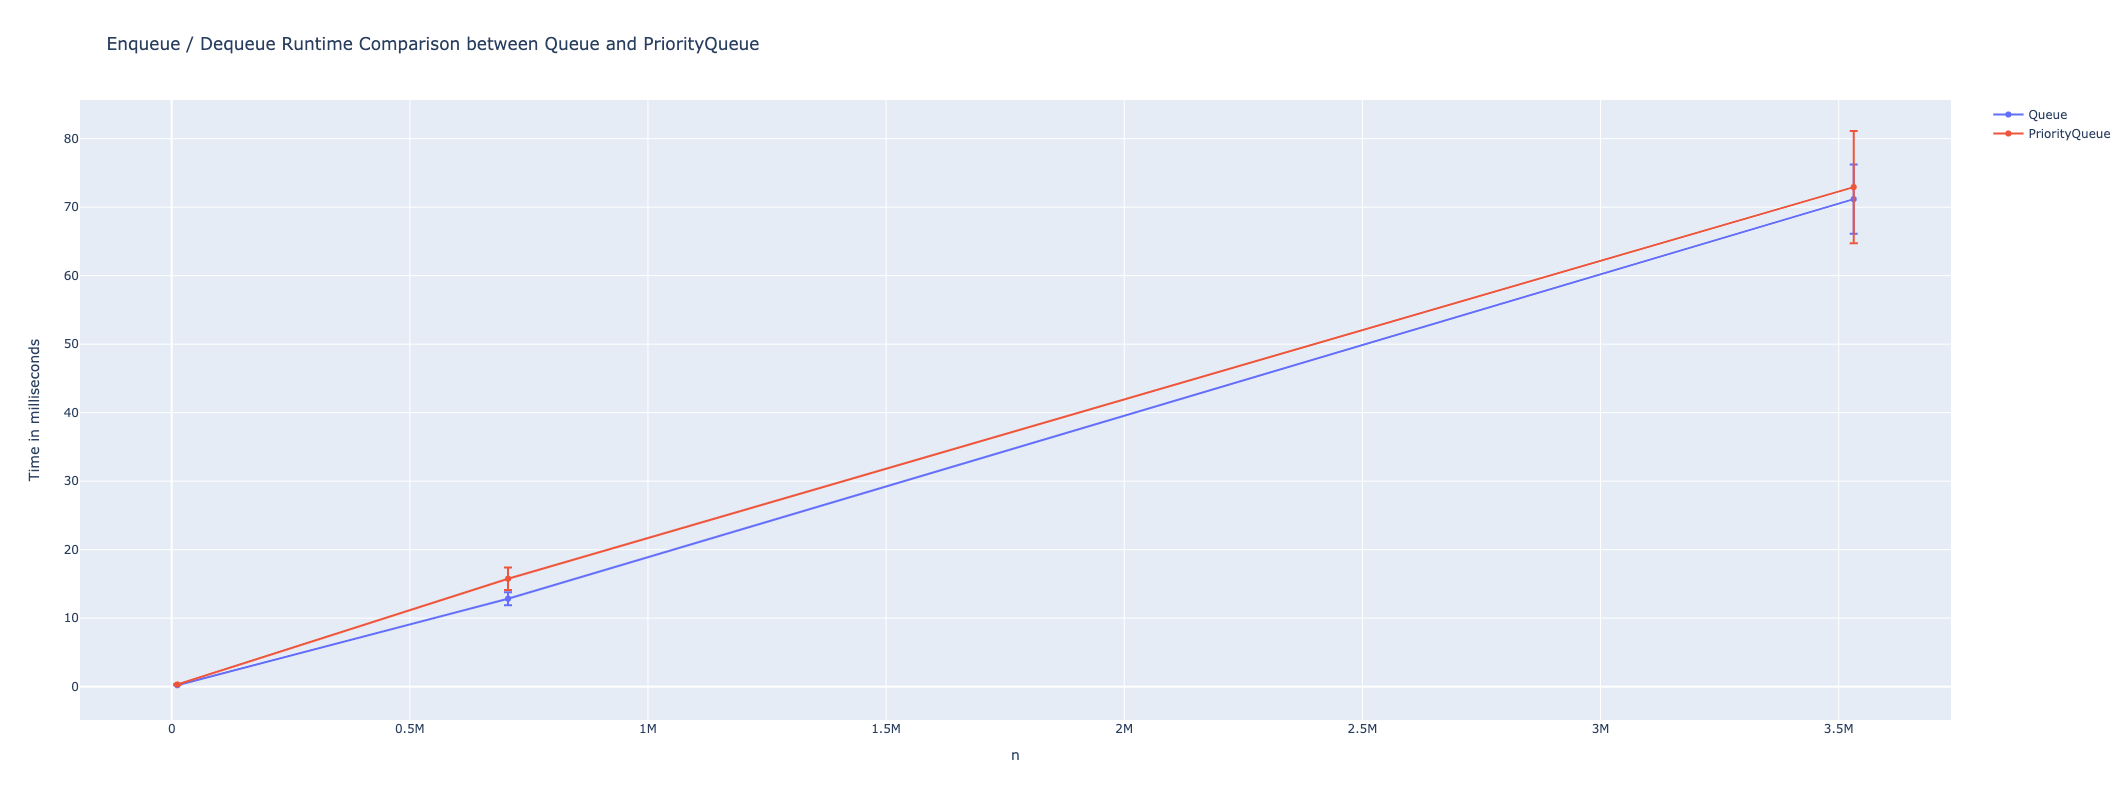

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=merged['n'], 
                         y=merged['queue_mean'],
                         mode='lines+markers',
                         name='Queue', 
                         error_y=dict(type='data', # value of error bar given in data coordinates
                                      array=merged['queue_std'],
                                      visible=True)))
fig.add_trace(go.Scatter(x=merged['n'], 
                         y=merged['priorityqueue_mean'],
                         mode='lines+markers',
                         name='PriorityQueue', 
                         error_y=dict(type='data', # value of error bar given in data coordinates
                                      array=merged['priorityqueue_std'],
                                      visible=True)))
# fig.update_xaxes(type="log")
# fig.update_yaxes(type="log")

fig.update_traces(hovertemplate=None)

fig.update_layout(title='Enqueue / Dequeue Runtime Comparison between Queue and PriorityQueue',
                  xaxis_title='n',
                  yaxis_title='Time in milliseconds',
                  autosize=False,
                  hovermode="x",
                  width=1000,
                  height=800)
fig.show()

In [16]:
fig.write_html('comparison.html')

In [13]:
merged

,n,queue_mean,queue_std,priorityqueue_mean,priorityqueue_std
0,11772,0.202992,0.015686,0.312105,0.056304
1,706320,12.842010,0.953259,15.752962,1.644125
2,3531600,71.172411,5.052995,72.925632,8.194155
